In [1]:
import os
import earthaccess
import rasters as rt
from EMITL2ARFL import *

date range

In [2]:
start_date = "2024-01-01"
end_date = "2024-12-31"

download directory

In [3]:
download_directory = "~/data/EMIT_download"

example spatial area

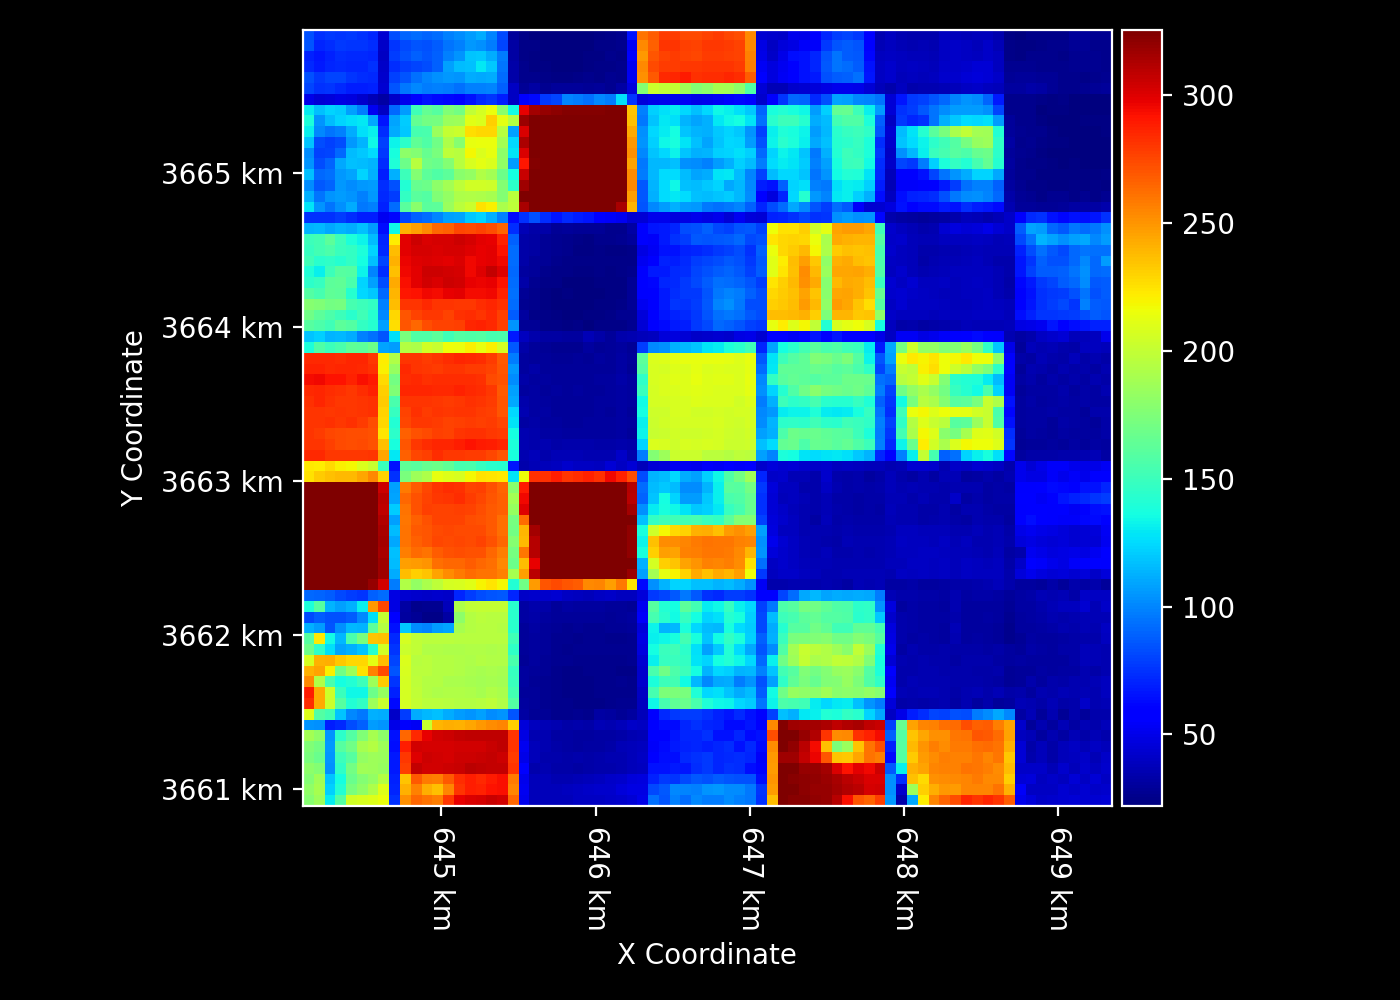

In [4]:
notebook_dir = os.path.dirname(os.path.abspath("Searching EMIT L2A Reflectance with earthaccess.ipynb"))
filename = os.path.join(notebook_dir, "farms_subset.tif")
subset = rt.Raster.open(filename)
subset

In [5]:
geometry = subset.geometry
geometry

{
  "dimensions": {
    "rows": 72,
    "cols": 75
  },
  "bbox": {
    "xmin": 644100.0,
    "ymin": 3660890.0,
    "xmax": 649350.0,
    "ymax": 3665930.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 70.0,
    "cell_height": -70.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [6]:
earthaccess.login(strategy="netrc", persist=True)

retrieve example granule for orbit 2428011 scene 4

In [7]:
granule = retrieve_EMIT_L2A_RFL_granule(orbit=2428011, scene=4, download_directory=download_directory)
granule

QUEUEING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/3 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/3 [00:00<?, ?it/s]

EMITL2ARFL(reflectance_filename="/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc", mask_filename="/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc", uncertainty_filename="/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc")

In [8]:
granule.reflectance_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFL_001_20241006T165200_2428011_004.nc'

In [9]:
granule.mask_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_MASK_001_20241006T165200_2428011_004.nc'

In [10]:
granule.uncertainty_filename

'/Users/halverso/data/EMIT_download/EMIT_L2A_RFL_001_20241006T165200_2428011_004/EMIT_L2A_RFLUNCERT_001_20241006T165200_2428011_004.nc'

In [11]:
granule.reflectance_netcdf.metadata

{'ncei_template_version': 'NCEI_NetCDF_Swath_Template_v2.0',
 'summary': "The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\\n\\nThis file contains L2A estimated surface reflectances and geolocation data. Reflectance estimates are created

In [12]:
granule.reflectance_netcdf.dimensions

{'downtrack': 1280,
 'crosstrack': 1242,
 'bands': 285,
 'ortho_y': 1886,
 'ortho_x': 2298}

In [13]:
np.nanmax(granule.GLT.cols)

np.int64(1242)

In [14]:
granule.quality_mask()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1280, 1242), dtype=float32)

In [15]:
reflectance_array = granule.reflectance_netcdf.read_array("reflectance")
reflectance_array

masked_array(
  data=[[[0.04626309, 0.05398547, 0.05795069, ..., 0.31790996,
          0.315799  , 0.3098343 ],
         [0.04187692, 0.05113221, 0.05679158, ..., 0.31916264,
          0.32094538, 0.31974575],
         [0.04509384, 0.05292892, 0.05585911, ..., 0.3239637 ,
          0.32642636, 0.32313606],
         ...,
         [0.06328347, 0.06922932, 0.06669623, ..., 0.21627465,
          0.21732892, 0.21542148],
         [0.06425325, 0.06335061, 0.06779118, ..., 0.24688615,
          0.24150588, 0.2410459 ],
         [0.06789973, 0.07200719, 0.07301982, ..., 0.25310352,
          0.24807498, 0.24632151]],

        [[0.0451612 , 0.05421726, 0.0626583 , ..., 0.3089115 ,
          0.32360414, 0.31185195],
         [0.04792179, 0.05777371, 0.06416553, ..., 0.32652107,
          0.32438907, 0.32405877],
         [0.04473403, 0.05517756, 0.05873911, ..., 0.32596916,
          0.3282403 , 0.32462648],
         ...,
         [0.06585173, 0.07134067, 0.07079189, ..., 0.23333152,
          0

In [16]:
reflectance_array.shape

(1280, 1242, 285)

In [17]:
reflectance_GLT = granule.GLT
reflectance_GLT.shape

(1886, 2298, 2)

In [18]:
apply_GLT(reflectance_array, reflectance_GLT)

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [ ]:
granule.reflectance()